In [1]:
import numpy as np
import pandas as pd
import pickle

from metric import *
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
# load the synthetic dataset
df = pd.read_csv('demo/demo_data.csv',encoding='utf-8')
# get feature values
X = df.loc[:, df.columns != 'y']

# load class probabilities
rf_probs = np.load('demo/rf_probs.npy')

# get n(number of data points) and m(number of classes)
n = X.shape[0]
m = rf_probs.shape[1]

# get predicted classes of instances
pred_y = []
for prob in rf_probs:
     y_tmp = 0
     prob_tmp = 0
     for i in np.arange(m):
          if prob[i]>prob_tmp:
               y_tmp=i
               prob_tmp=prob[i]
     pred_y.append(y_tmp)
    
# calculate pairwise distances of instances in terms of feature values
D_high_matrix = cal_D_matrix(X)

alpha= 0
(404, 4) 404.0
kl_d  63.42797832900653 | kl_c  1.2749085658655335 

[t-SNE] Iteration 50: error = 63.4279783, gradient norm d= 0.3886071 gradient norm c= 0.4476067 (50 iterations in 0.452s)
kl_d  61.209738011614704 | kl_c  0.3672022891642534 

[t-SNE] Iteration 100: error = 61.2097380, gradient norm d= 0.2985258 gradient norm c= 0.0110517 (50 iterations in 0.513s)
kl_d  60.852403805060206 | kl_c  0.3981573739018325 

[t-SNE] Iteration 150: error = 60.8524038, gradient norm d= 0.2619605 gradient norm c= 0.0081658 (50 iterations in 0.430s)
kl_d  60.521146735977254 | kl_c  0.41444332697539066 

[t-SNE] Iteration 200: error = 60.5211467, gradient norm d= 0.2631866 gradient norm c= 0.0120359 (50 iterations in 0.531s)
kl_d  59.84356895193014 | kl_c  0.4174662001809408 

[t-SNE] Iteration 250: error = 59.8435690, gradient norm d= 0.2325592 gradient norm c= 0.0093062 (50 iterations in 0.412s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.843569
kl_d  1.3093645

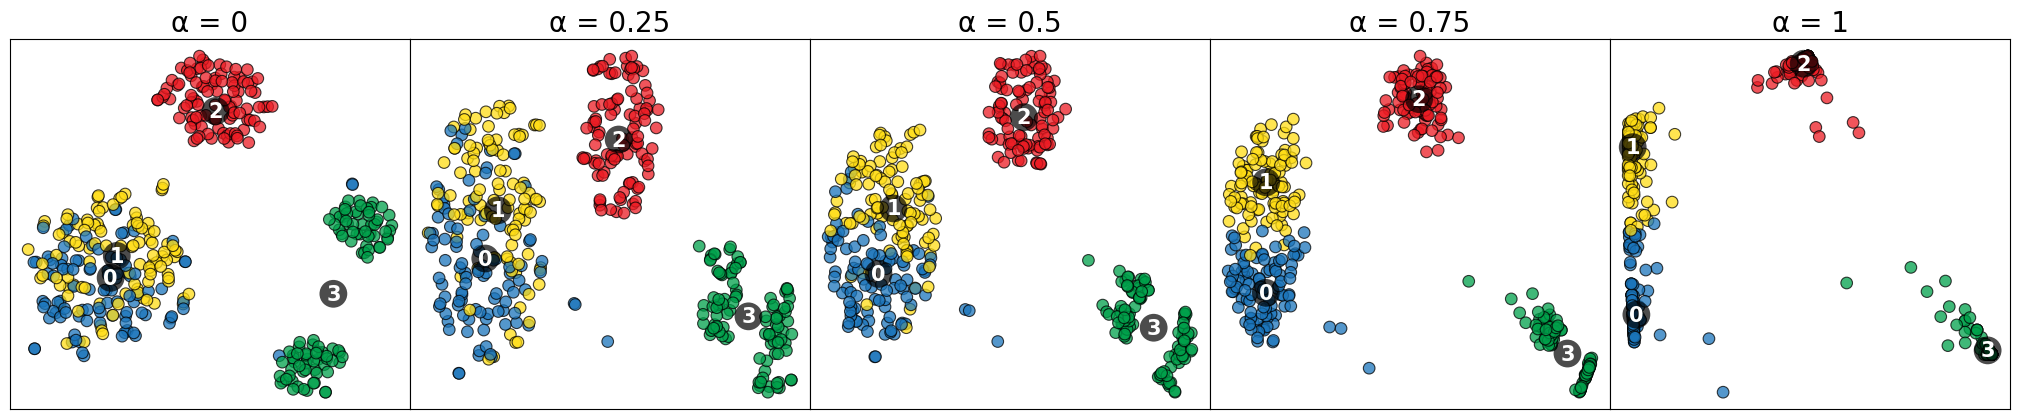

In [6]:
from cstsne_python.cstsne import csTSNE 

tsne = csTSNE(perplexity=10)

fig, axs = plt.subplots(figsize=(20,4),ncols=5,nrows=1)

# iterate 5 alpha values from 0 to 1
alpha = [0,0.25,0.5,0.75,1]
for i in np.arange(5):
  axs[i].tick_params(left = False, right = False , labelleft = False ,
            labelbottom = False, bottom = False)
  print("alpha=",alpha[i])

  if i==0:
      points, classes =  tsne.fit(X, rf_probs, alpha[i])
  # or else we use the last projection results as initialization and compute without early exaggeration
  else:
      points, classes = tsne.renew(alpha[i])

  df["comp-1"] = points[:,0]
  df["comp-2"] = points[:,1]

  colors = [ "#1b75bb", "#ffdd15", "#ec1c24",  "#00a14b"]

  sns.scatterplot(x="comp-1", y="comp-2", hue=pred_y,
                palette=colors, s=70,
                data=df, legend=False, alpha=0.75, ax=axs[i], edgecolor="black",linewidth=0.8).set_title("\u03B1 = "+str(alpha[i]),fontsize=20)

  sns.scatterplot(x=classes[:,0], y=classes[:,1], alpha=0.7,
                color="black", marker= "o", s =400, legend=False, ax=axs[i],edgecolor="none")

  for j in np.arange(m):
      axs[i].text(classes[j,0], classes[j,1], j, fontsize=15, horizontalalignment='center', verticalalignment='center', color='white', weight='semibold')

fig.tight_layout(pad=0)

